In [1]:
from array import array
import math
import random
import numpy as np

In [2]:
def generator_function(x):
    return 3.0/2.0*(1.0 - x*x)

In [3]:
random.seed(1)

In [4]:
max_order = 6
min_order = 2
nbins = 20

norders = max_order - min_order + 1
nbin = nbins

np = array('d')
enp = array('d')
sum2 = array('d')
esum2 = array('d')
esum3 = array('d')
np2 = array('d')
np2mid = array('d')

summid = array('d')
esummid = array('d')
esummid3 = array('d')

sum = [[0 for x in range(0,nbin)] for y in range(0,norders)]

for j in range(min_order,max_order+1):
    npoints = 10**j
    np.append(npoints)
    np2.append(math.log(npoints))
    np2mid.append(math.log(npoints))
    enp.append(0.0)
    sum2.append(0.0)
    esum2.append(0.0)
    esum3.append(0.0)
    
    summid.append(0.0)
    esummid.append(0.0)
    esummid3.append(0.0)
    
    xlow = 0.0
    xhigh = 1.0
    dx = (xhigh-xlow)/npoints
        
    for i in range(0,int(npoints)):
        xmid = xlow+i*dx+dx/2.0
        ymid = generator_function(xmid)
        summid[j-min_order] += dx*ymid
        
    print("Midpoint integral = %.16f" % summid[j-min_order])
    esummid[j-min_order]=math.fabs(1.0-summid[j-min_order])
    print("Midpoint Error = %.16f" % esummid[j-min_order])
    esummid3[j-min_order]=math.log(esummid[j-min_order])
    
    for k in range(0,nbin):
        for i in range(0,int(npoints)):
            xval = xlow+random.random()*(xhigh-xlow)
            yval = generator_function(xval)
            sum[j-min_order][k] += dx*yval
        
            
    for k in range(0,nbin):
        sum2[j-min_order] += sum[j-min_order][k]/nbin
        
    for k in range(0,nbin):
        esum2[j-min_order] += math.pow((sum[j-min_order][k]-sum2[j-min_order]),2)/nbin
    
    esum2[j-min_order]=math.sqrt(esum2[j-min_order])
    print("MC Integral = %.16f +/- %.16f for npoints = %d" %(sum2[j-min_order],esum2[j-min_order],npoints))
    print("MC Error = %.16f" % math.fabs(1.0-sum2[j-min_order]))
    esum3[j-min_order]=math.log(esum2[j-min_order])


print (len(np),len(sum2), len(esum2))


Midpoint integral = 1.0000125000000000
Midpoint Error = 0.0000125000000000
MC Integral = 0.9965445554986536 +/- 0.0484017236546976 for npoints = 100
MC Error = 0.0034554445013464
Midpoint integral = 1.0000001250000008
Midpoint Error = 0.0000001250000008
MC Integral = 1.0013197590593323 +/- 0.0113174747356607 for npoints = 1000
MC Error = 0.0013197590593323
Midpoint integral = 1.0000000012499979
Midpoint Error = 0.0000000012499979
MC Integral = 0.9993296122057134 +/- 0.0039444180337023 for npoints = 10000
MC Error = 0.0006703877942866
Midpoint integral = 1.0000000000124949
Midpoint Error = 0.0000000000124949
MC Integral = 0.9999911433646549 +/- 0.0015508276405469 for npoints = 100000
MC Error = 0.0000088566353451
Midpoint integral = 1.0000000000002010
Midpoint Error = 0.0000000000002010
MC Integral = 0.9999351258181325 +/- 0.0006130600625042 for npoints = 1000000
MC Error = 0.0000648741818675
5 5 5


array('d', [100.0, 1000.0, 10000.0, 100000.0, 1000000.0]) array('d', [1.0000125, 1.0000001250000008, 1.0000000012499979, 1.000000000012495, 1.000000000000201]) array('d', [1.2499999999970868e-05, 1.2500000079462836e-07, 1.2499978829794145e-09, 1.2494894008341362e-11, 2.0095036745715333e-13])


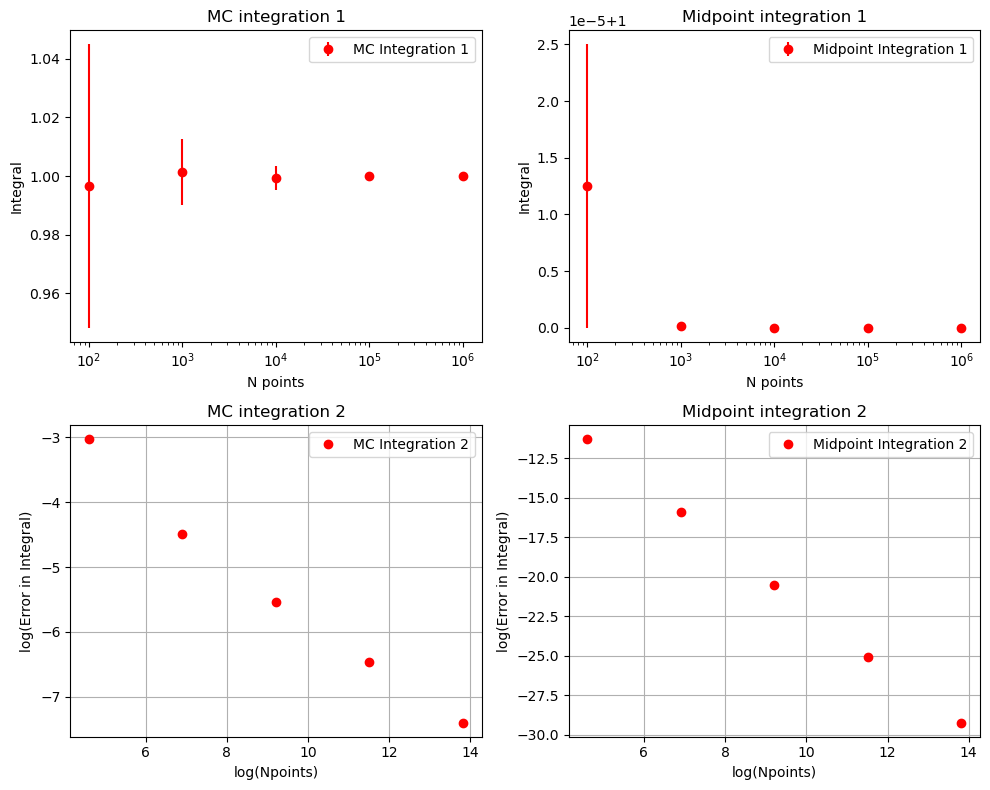

In [5]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

print (np,summid,esummid)

# MC integration 1
axes[0, 0].set_xscale('log')
axes[0, 0].errorbar(np, sum2, yerr=esum2, fmt='o', color='r', label='MC Integration 1')
axes[0, 0].set_xlabel('N points')
axes[0, 0].set_ylabel('Integral')
axes[0, 0].set_title('MC integration 1')
axes[0, 0].legend()

# Midpoint integration 1
axes[0, 1].set_xscale('log')
axes[0, 1].errorbar(np, summid, yerr=esummid, fmt='o', color='r', label='Midpoint Integration 1')
axes[0, 1].set_xlabel('N points')
axes[0, 1].set_ylabel('Integral')
axes[0, 1].set_title('Midpoint integration 1')
axes[0, 1].legend()

# MC integration 2
axes[1, 0].plot(np2, esum3, 'o', color='r', label='MC Integration 2')
axes[1, 0].set_xlabel('log(Npoints)')
axes[1, 0].set_ylabel('log(Error in Integral)')
axes[1, 0].set_title('MC integration 2')
axes[1, 0].legend()
axes[1, 0].grid()

# Midpoint integration 2
axes[1, 1].plot(np2mid, esummid3, 'o', color='r', label='Midpoint Integration 2')
axes[1, 1].set_xlabel('log(Npoints)')
axes[1, 1].set_ylabel('log(Error in Integral)')
axes[1, 1].set_title('Midpoint integration 2')
axes[1, 1].legend()
axes[1, 1].grid()

plt.tight_layout()
plt.show()
